In [1]:
import cv2
from os.path import dirname, basename
from IPython.display import Image


img_input = 'data/imagen_8.jpg'

img_thresh = "%s/thresh_%s" % (dirname(img_input), basename(img_input))

#read the image
image = cv2.imread(img_input)



In [2]:
# apply binary thresholding
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold = 140

ret, thresh = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
cv2.imwrite(img_thresh, thresh)

True

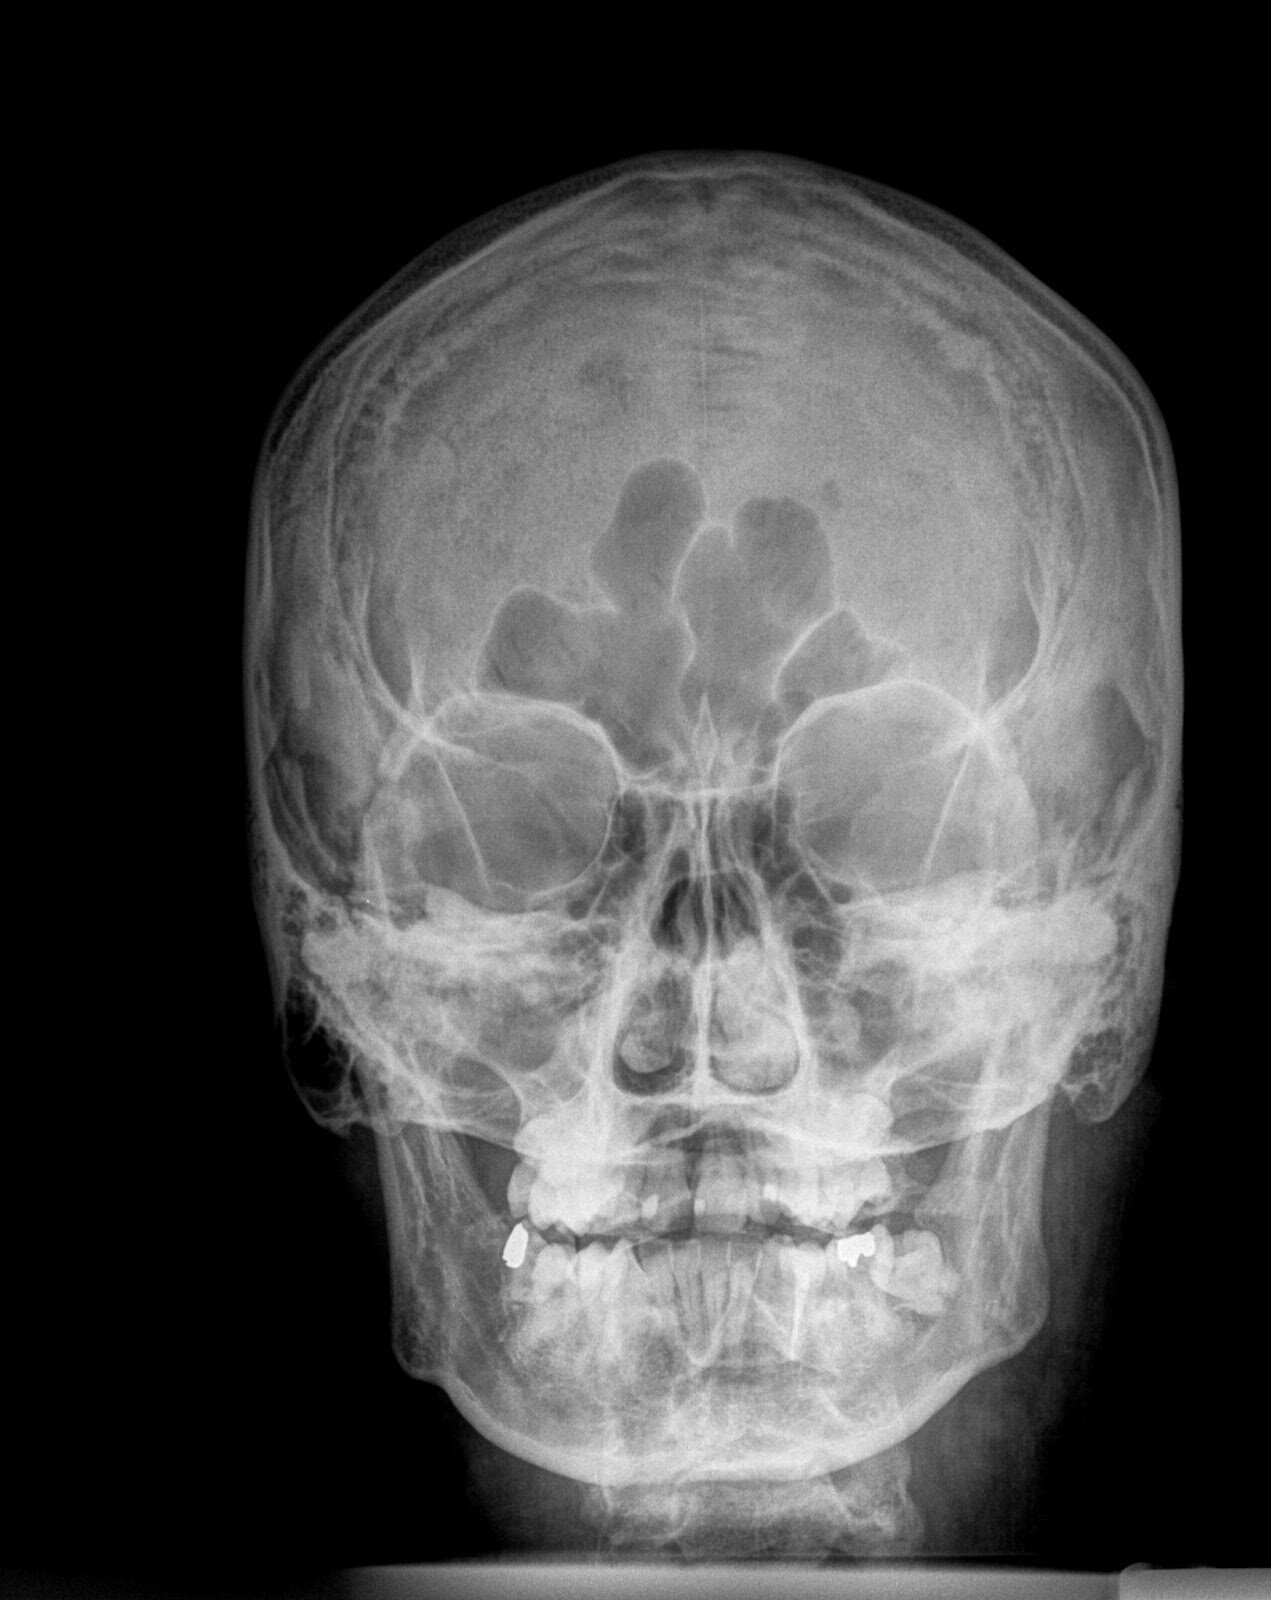

In [3]:
Image(filename=img_input, width=400)

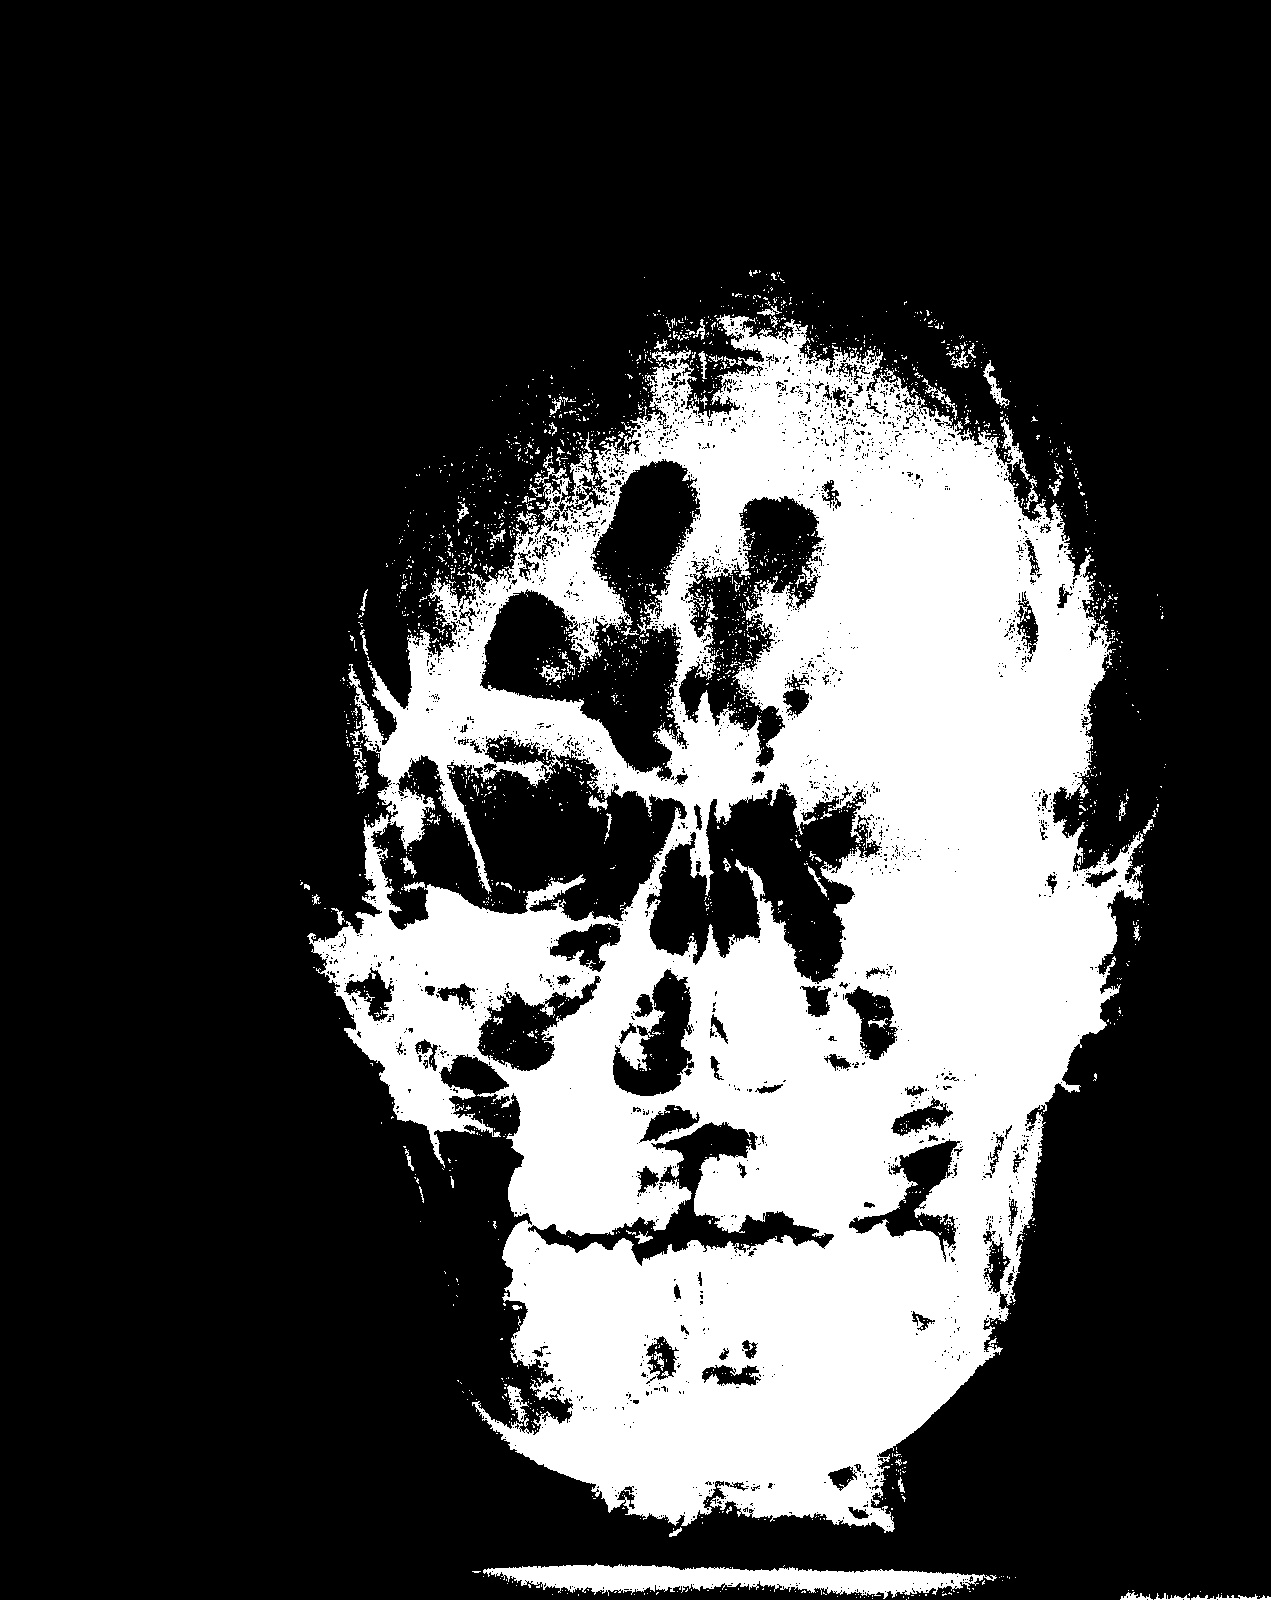

In [4]:
Image(filename=img_thresh, width=400)

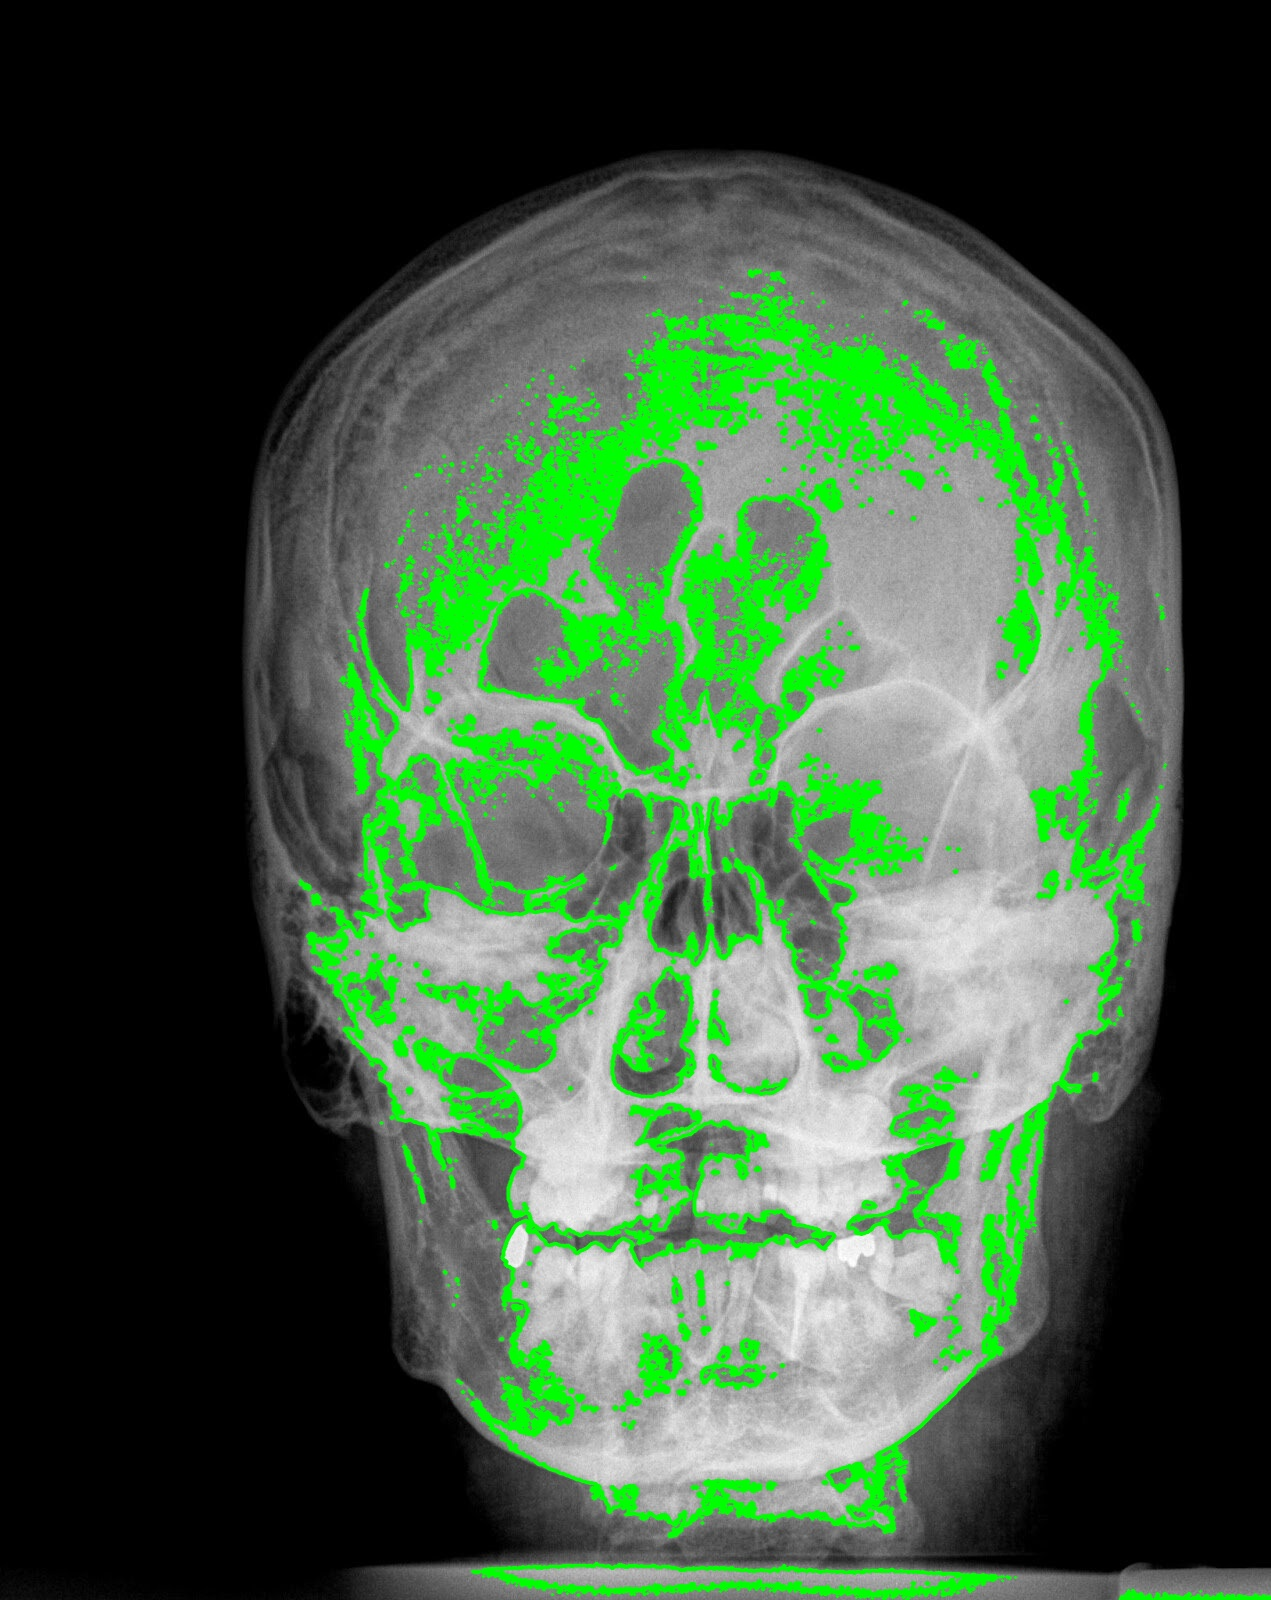

In [5]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

img_contours_none = "%s/cont_none_%s" % (dirname(img_input), basename(img_input))

cv2.imwrite(img_contours_none, image_copy)
Image(filename=img_contours_none, width=400)

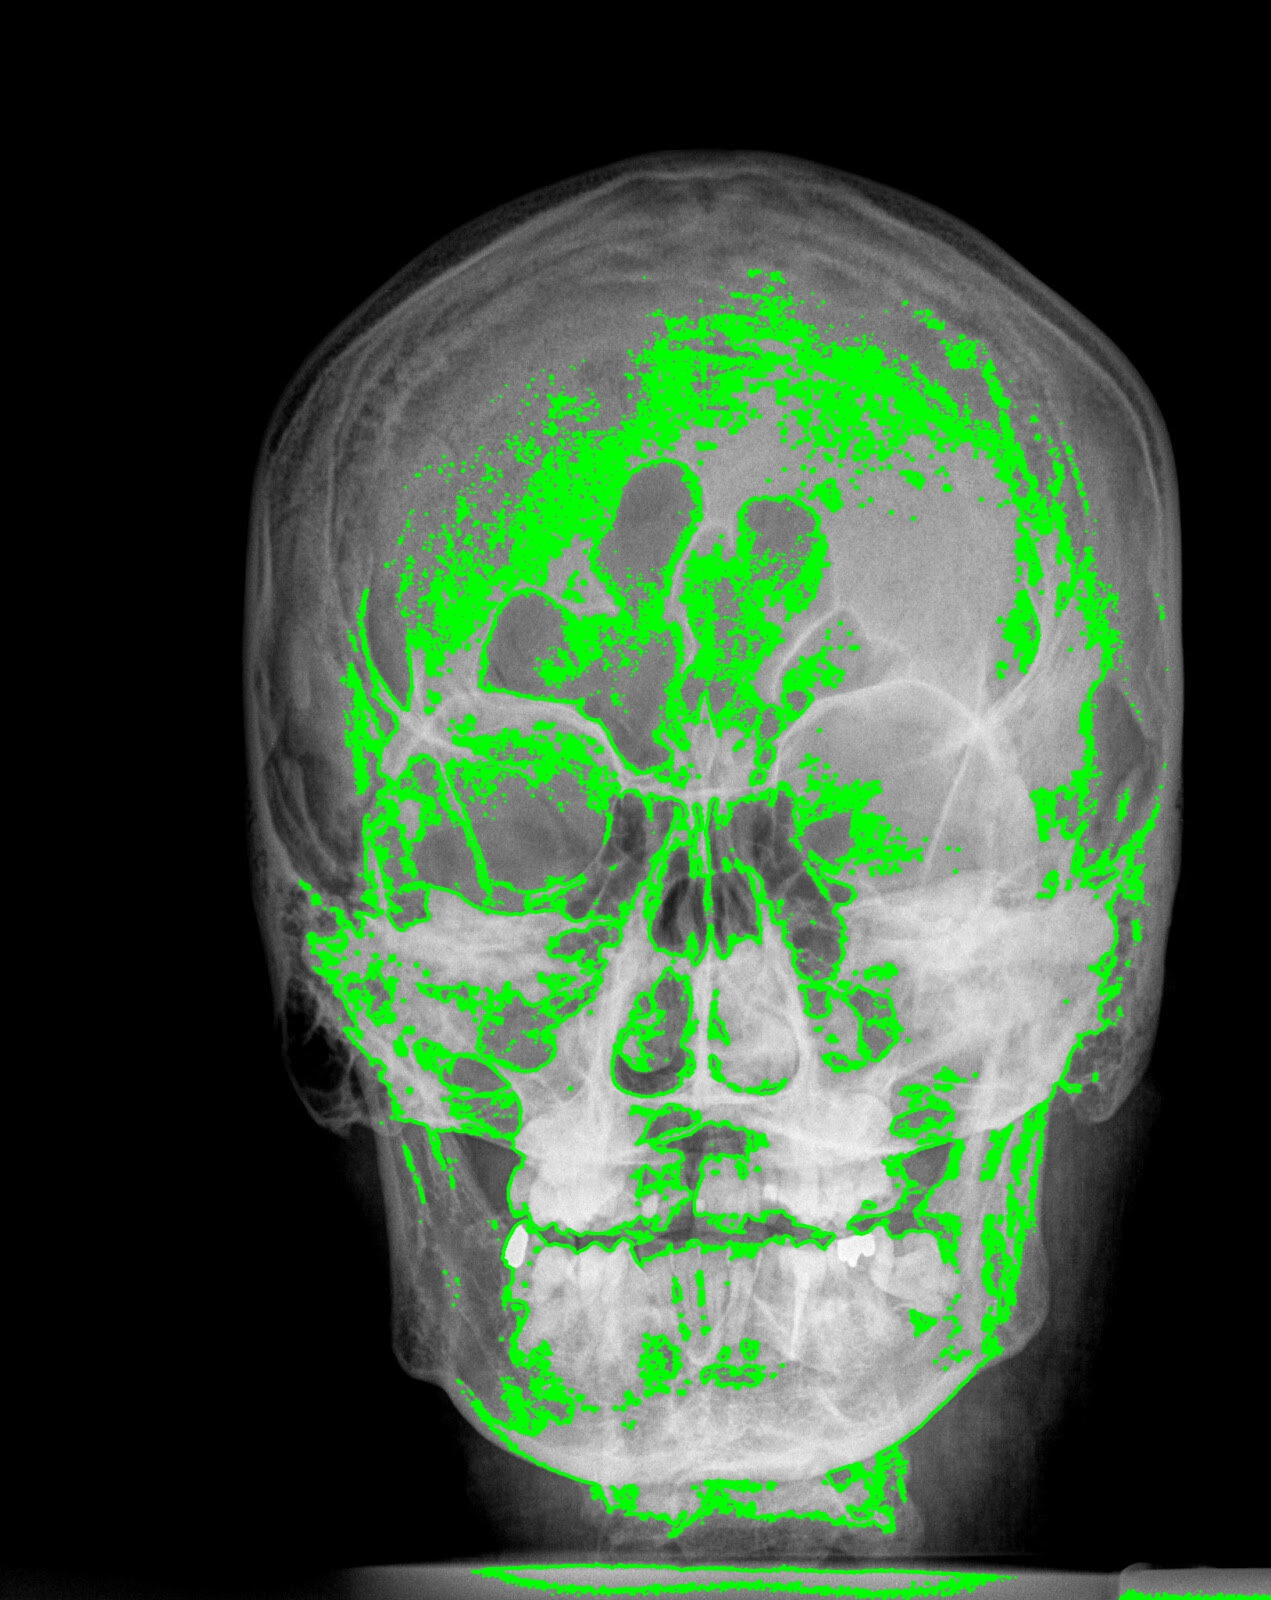

In [6]:
"""
Now let's try with `cv2.CHAIN_APPROX_SIMPLE`
"""
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy = image.copy()
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
img_contours_simple = "%s/cont_simple_%s" % (dirname(img_input), basename(img_input))

cv2.imwrite(img_contours_simple, image_copy)
Image(filename=img_contours_simple, width=400)


1062
7775
1343
1636
1439
1477


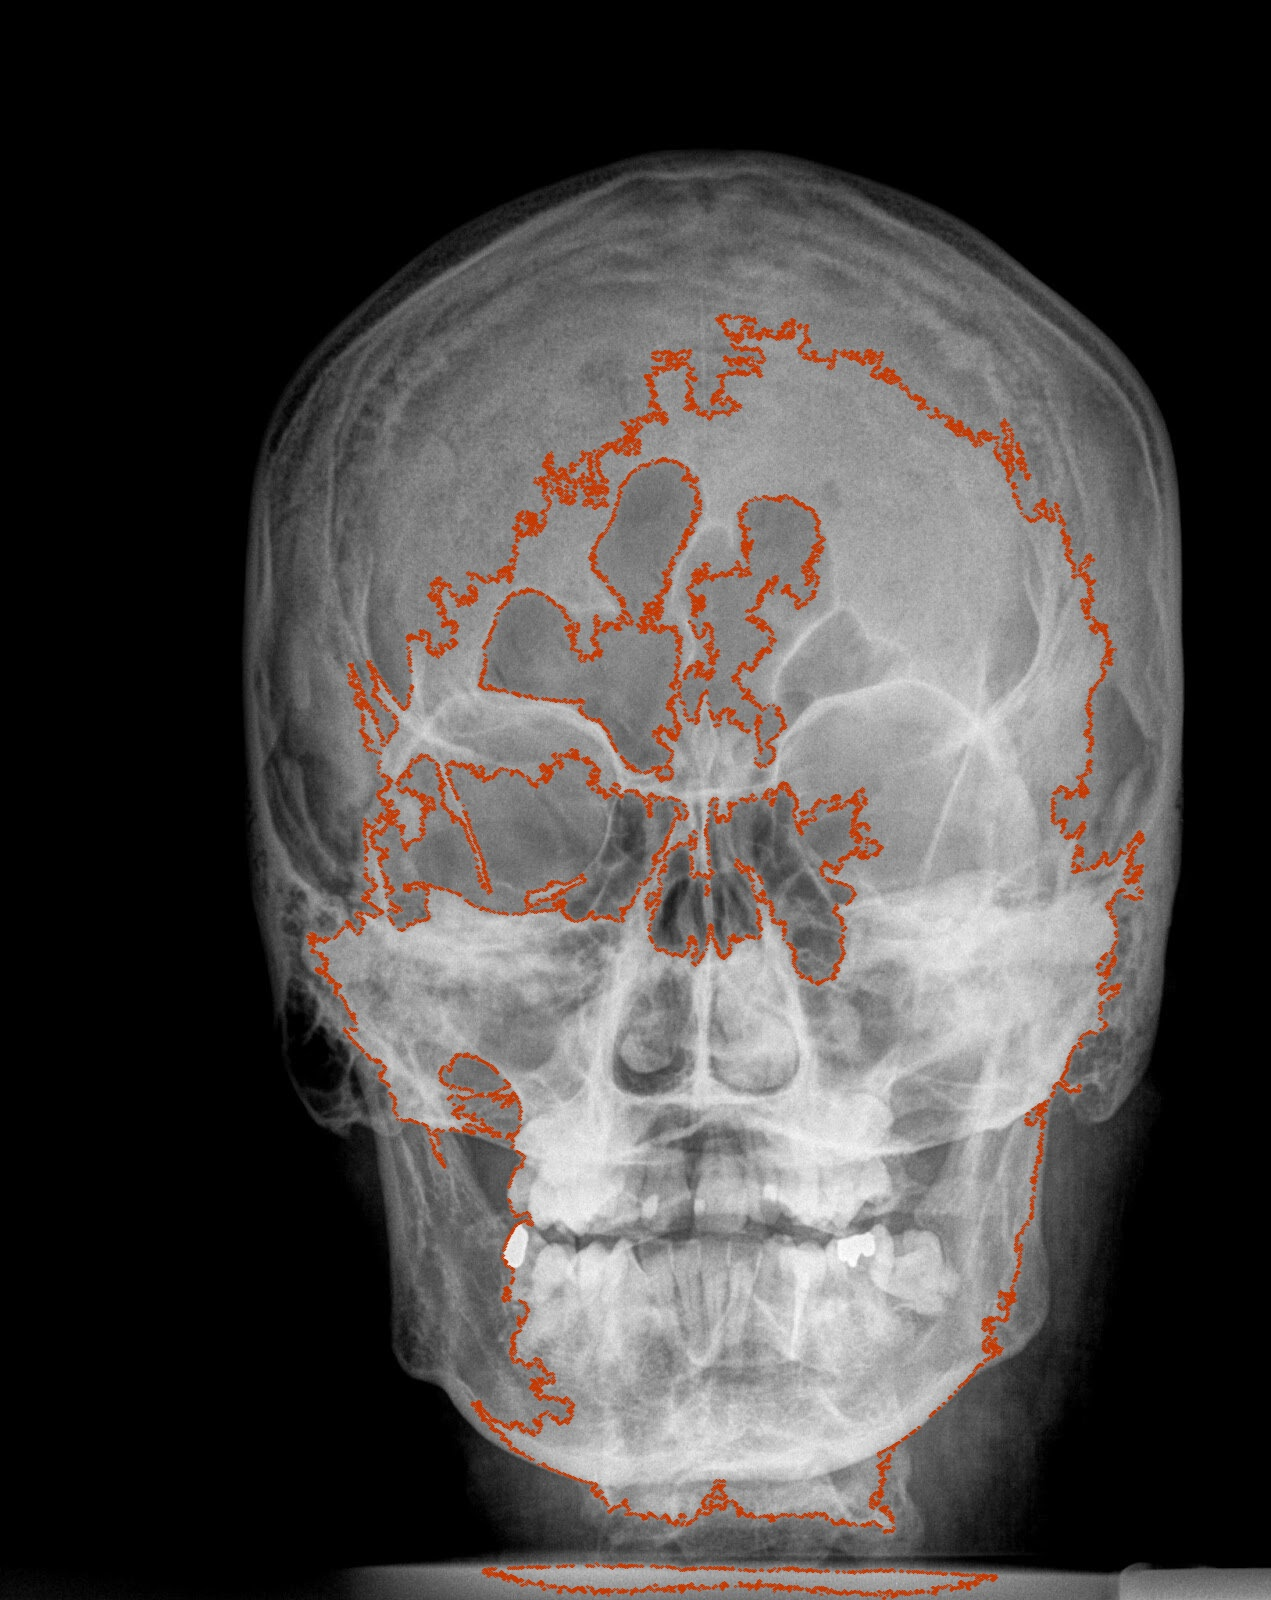

In [7]:
# keep only large contours
image_copy = image.copy()

for i, contour in enumerate(contours): # loop over one contour area
    if len(contour)>1000:
        print(len(contour))
        for j, contour_point in enumerate(contour): # loop over the points
            # draw a circle on the current contour coordinate
            cv2.circle(image_copy, ((contour_point[0][0], contour_point[0][1])), 1, (0, 55, 200), 1, cv2.LINE_AA)

img_large_contours = "%s/cont_large_%s" % (dirname(img_input), basename(img_input))

cv2.imwrite(img_large_contours, image_copy)
Image(filename=img_large_contours, width=400)